## Getting Started

#### Instructions: Run the cell below to import the necessary libraries. Links to official package documentation are provided.

In [20]:
# General imports
import math, sys, collections
from IPython.display import display


# Data science imports
import pandas as pd # pandas documentation: 
import numpy as np # numpy documentation:
import scipy as sp

# ML imports
import sklearn # sk learn documentation:
from sklearn import neighbors, tree, svm, linear_model, metrics    # Main ML models

# Graphical imports
from PIL import Image
from matplotlib import pyplot as plt # matplotlib documentation:

# Configuration
np.set_printoptions(threshold=sys.maxsize, linewidth=500)

#### Instructions: Use the pandas documentation to read about the operation of the `read_csv` function. Use this function to read in the data file from `/data/digits.csv`. The `read_csv` function returns a `DataFrame` object. A data frame is essentially a mini spreadsheet table. Save this data frame in a variable. Starter code for this task is provided below. Hint, use the proved `col_names` variable as column names for the `DataFrame`.

In [4]:
# digits_data_train = pd.read_csv(...)
# digits_data_test = pd.read_csv(...)
col_names = ["pixel " + str(i) for i in range(64)] + ["true digit"]


digits_train = pd.read_csv("../data/digits_train.csv",names = col_names)
digits_test = pd.read_csv("../data/digits_test.csv",names=col_names)

#### Instructions: Call the `display` function on our data frames

In [5]:
### Display data frames here
display(digits_train)
display(digits_test)

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 55,pixel 56,pixel 57,pixel 58,pixel 59,pixel 60,pixel 61,pixel 62,pixel 63,true digit
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,0,0,5,13,11,2,0,0,0,2,...,0,0,0,8,13,15,10,1,0,9
3819,0,0,0,1,12,1,0,0,0,0,...,0,0,0,0,4,9,0,0,0,4
3820,0,0,3,15,0,0,0,0,0,0,...,0,0,0,4,14,16,9,0,0,6
3821,0,0,6,16,2,0,0,0,0,0,...,0,0,0,5,16,16,16,5,0,6


,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 55,pixel 56,pixel 57,pixel 58,pixel 59,pixel 60,pixel 61,pixel 62,pixel 63,true digit
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1793,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1794,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1795,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


Before moving onto data preparation, consider what each row represents in the data frame. What does each column represent? Hint: read the dataset description [here](website.com)

## Data Preparation

Let's remember the data we're given. We are given both **feature values** (here, image information) and **labels** (here, the value of the handwritten digit). In the data frame we initialized, all of this information is packaged together. We need to separate the feature values into one data frame (typically denoted ` <dataset name>_<train/test>_X`) and the labels (or **targets**) into another (typically denoted `<dataset name>_<train/test>_y`). To accomplish this, we can use the `pop` function (from the `pandas` library) to "pop off" the labels column of the data frame. Using `pandas` documentation as a guide, obtain the following four `DataFrame`s: 

* training features
* training labels
* testing features
* testing labels

*Note: Error checking code provided so that if the cell is rerun and the target column has already been popped off the `DataFrame`, there won't be any errors.*

In [6]:
try:
    ### Add code to get the four data frames here ###
    digits_train_y = digits_train.pop("true digit")
    digits_train_X = digits_train

    digits_test_y = digits_test.pop("true digit")
    digits_test_X = digits_test 
except KeyError as e:
    print("Note: Key Error Exception thrown---the key %s may not exist." %(e))

#### Instructions: Fit a first machine learning model (KNN) using the starter code given below. Using the SK learn documentation as a guide, fill in the missing sections.

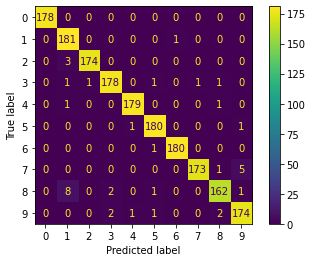

In [38]:
knn_classifier = neighbors.KNeighborsClassifier(n_neighbors = 5, algorithm = 'brute') # Creating a KNN classifier object

# Fit the KNN classifier with the TRAINING DATA here 
knn_classifier.fit(digits_train_X, digits_train_y) 

# Score (using the default metric of accuracy) the KNN classifier here USING TEST DATA
knn_classifier.score(digits_test_X, digits_test_y)

# Obtain a list of predictions here 
predictions = knn_classifier.predict(digits_test_X)
true_values = digits_test_y

# Uncomment the following line to see a confusion matrix for the data.
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(true_values, predictions)).plot()

#### Instructions: Implement the K-nearest neighbors algorithm. This function should take 5 parameters: `X_train`, `y_train`, `X_test`, `y_test`, and `k`. It should (1) print predictions, true values, test example #, and whether the classifier was correct for each test example and (2) return the accuracy of this model. (Your implementation may require much more computational time than the library method since the library method uses low-level C code) <!--It should run in $O(m\cdot n\cdot k\log(k))$ time, where $n$ is the length of `X_test` and $m$ is the length of `X_train`. (Note that since, typically, $k$ is regarded as a small constant with $k \ll n$, the runtime is essentially $O(n)$.)-->

#### You should create a helper function that calculates the distance between two examples in a `DataFrame`.

In [33]:
### Implement KNN here.
import time

def distance(a, b):
    a = np.asarray(a)
    b = np.asarray(b)
    assert(a.shape == b.shape)
    _sum = 0
    for axis in range(len(a)):
        _sum += (b[axis] - a[axis])**2
    return math.sqrt(_sum)
        

def KNN(X_train, y_train, X_test, y_test, k):
    predictions = np.zeros(y_test.shape)
    i = 0
    correct = 0
    print("Test example # | Predicted digit | Actual digit | Correct (Y/N)")
    print("-----------------------------------------------------------------")
    for example_test in X_test.iterrows():
        running_nn = []
        i += 1
        for example_train in X_train.iterrows():
            _distance = distance(example_train[1], example_test[1])
            info_tuple = (_distance, example_train[0])
            if len(running_nn) < k:
                running_nn.append(info_tuple)
            elif _distance < running_nn[-1][0]:
                running_nn[-1] = (info_tuple)
                running_nn.sort()
        labs = [y_train[x[1]] for x in running_nn]
        prediction = sp.stats.mode(labs)[0][0]
        if prediction == y_test[i-1]:
            correct += 1
        print("%d\t\t     %d\t\t     %d\t\t     %s" %(i, prediction, y_test[i-1], "Y" if prediction == y_test[i-1] else "N"))
    return correct/len(y_test)

KNN(digits_train_X, digits_train_y, digits_test_X, digits_test_y, 5)

Test example # | Predicted digit | Actual digit | Correct (Y/N)
-----------------------------------------------------------------
1		     0		     0		     Y
2		     1		     1		     Y
3		     1		     2		     N
4		     3		     3		     Y
5		     4		     4		     Y
6		     9		     5		     N
7		     6		     6		     Y
8		     7		     7		     Y
9		     8		     8		     Y
10		     9		     9		     Y
11		     0		     0		     Y
12		     1		     1		     Y
13		     2		     2		     Y
14		     3		     3		     Y
15		     4		     4		     Y
16		     5		     5		     Y
17		     6		     6		     Y
18		     7		     7		     Y
19		     8		     8		     Y
20		     9		     9		     Y
21		     0		     0		     Y
22		     1		     1		     Y
23		     2		     2		     Y
24		     3		     3		     Y
25		     4		     4		     Y
26		     5		     5		     Y
27		     6		     6		     Y
28		     7		     7		     Y
29		     8		     8		     Y
30		     9		     9		     Y
31		     0		     0		     Y
32		     9		     9		     Y
33		     5		   

KeyboardInterrupt: 

## Real-World handwriting

=== Array representation of handwritten digit ===
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

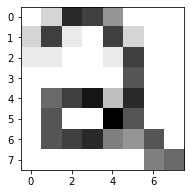

=== Feature vector representation of handwritten digit ===


,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 54,pixel 55,pixel 56,pixel 57,pixel 58,pixel 59,pixel 60,pixel 61,pixel 62,pixel 63
0,0.0,2.0,10.0,9.0,5.0,0.0,0.0,0.0,2.0,9.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0


=== Array representation of handwritten digit ===
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

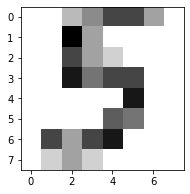

=== Feature vector representation of handwritten digit ===


,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 54,pixel 55,pixel 56,pixel 57,pixel 58,pixel 59,pixel 60,pixel 61,pixel 62,pixel 63
0,0.0,0.0,3.0,5.0,8.0,8.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,4.0,2.0,0.0,0.0,0.0,0.0


=== Array representation of handwritten digit ===
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 

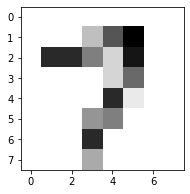

=== Feature vector representation of handwritten digit ===


,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 54,pixel 55,pixel 56,pixel 57,pixel 58,pixel 59,pixel 60,pixel 61,pixel 62,pixel 63
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


=== Array representation of handwritten digit ===
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 

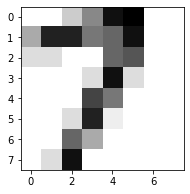

=== Feature vector representation of handwritten digit ===


,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 54,pixel 55,pixel 56,pixel 57,pixel 58,pixel 59,pixel 60,pixel 61,pixel 62,pixel 63
0,0.0,0.0,3.0,7.0,14.0,15.0,0.0,0.0,5.0,13.0,...,0.0,0.0,0.0,2.0,14.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def process_human_example(image_file_path, verbose = True):
    newArr = np.zeros(shape=(32,32))
    img = Image.open(image_file_path).convert('RGBA')
    arr = np.array(img)
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            if arr[i, j, 3] == 255: 
                newArr[i, j] = 1
    
    if verbose:
        print("=== Array representation of handwritten digit ===")       
        print(newArr)
        print()

    
    finalArr = np.zeros(shape=(8, 8))
    for i in range(32):
        for j in range(32):
            finalArr[i//4, j//4] += newArr[i, j]
    
    if verbose:
        print("=== Compressed array representation of handwritten digit ===")
        print(finalArr)
        print()
        print("=== Graphical pseudo-greyscale representation of image ===")
        plt.figure(1, figsize=(3, 3))
        plt.imshow(finalArr, cmap=plt.cm.gray_r, interpolation="nearest")
        plt.show()
    
    feature_vector = pd.DataFrame(finalArr.ravel()).T
    feature_vector.columns = col_names[:-1]
    
    if verbose:
        print("=== Feature vector representation of handwritten digit ===")
        display(feature_vector)
    
    return feature_vector

novel_query_2 = process_human_example("../images/Handwritten_2.png")
novel_query_5 = process_human_example("../images/Handwritten_5.png")
novel_query_7 = process_human_example("../images/Handwritten_7.png")
novel_query_7_larger = process_human_example("../images/Handwritten_7-larger.png")

In [ ]:
print(knn_classifier.predict(novel_query_2),
knn_classifier.predict(novel_query_5),
knn_classifier.predict(novel_query_7),
knn_classifier.predict(novel_query_7_larger))

[2] [5] [2] [7]
